In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

#### 1. Prepare the data

In [3]:
x_data = datasets.load_boston().data[:, 12] # 주변 이웃 중 하위 계층의 비율
y_data = datasets.load_boston().target # 집의 가격 (in $1,000s)
df = pd.DataFrame([x_data, y_data]).transpose()
df.head()

,0,1
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


#### 2. Build the model

In [4]:
w = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

y_predicted = w * x_data + b 

Instructions for updating:
Colocations handled automatically by placer.


#### 3. Set the criterion

In [5]:
loss = tf.reduce_mean(tf.square(y_predicted - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(loss)

#### 4. Train the model

In [6]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) 

    for step in range(10000):
        sess.run(train)
        
        if step % 1000 == 0:
            print('Step {}: w {} b {}'.format(step, sess.run(w), sess.run(b)))
            print('loss {}'.format(sess.run(loss)))
            print()

    w_out, b_out = sess.run([w, b]) 

Step 0: w [-0.18556243] b [2.2404127]
loss 580.8118286132812
Tensor("add:0", shape=(506,), dtype=float32)

Step 1000: w [0.24681847] b [14.618411]
loss 134.3455810546875
Tensor("add:0", shape=(506,), dtype=float32)

Step 2000: w [-0.21004325] b [22.228052]
loss 75.1290512084961
Tensor("add:0", shape=(506,), dtype=float32)

Step 3000: w [-0.49251357] b [26.932972]
loss 52.4919548034668
Tensor("add:0", shape=(506,), dtype=float32)

Step 4000: w [-0.66716164] b [29.841969]
loss 43.83828353881836
Tensor("add:0", shape=(506,), dtype=float32)

Step 5000: w [-0.7751437] b [31.640554]
loss 40.530189514160156
Tensor("add:0", shape=(506,), dtype=float32)

Step 6000: w [-0.8419071] b [32.752586]
loss 39.26558303833008
Tensor("add:0", shape=(506,), dtype=float32)

Step 7000: w [-0.8831864] b [33.440147]
loss 38.78214645385742
Tensor("add:0", shape=(506,), dtype=float32)

Step 8000: w [-0.9087089] b [33.86526]
loss 38.59733581542969
Tensor("add:0", shape=(506,), dtype=float32)

Step 9000: w [-0.924

#### 5. Visualize trained model

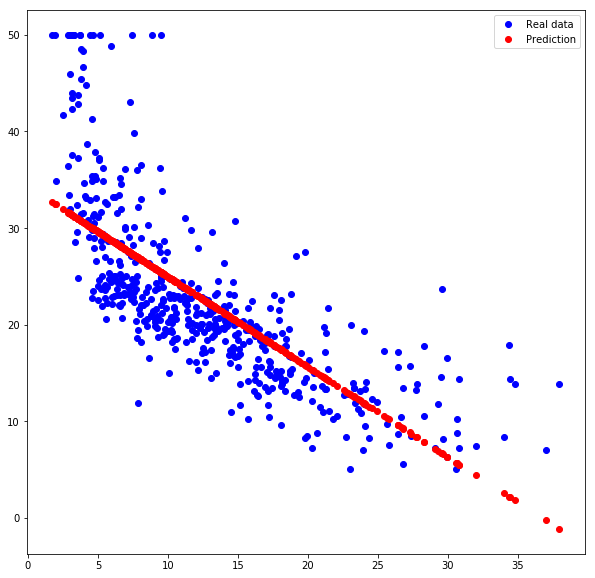

In [7]:
plt.figure(figsize = (10,10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, x_data * w_out + b_out, 'ro', label='Prediction')
plt.legend()
plt.show()

#### + Appendix. Gradient Descent 단계마다 Trained model 그리기(Plotting)

Step 0: w [0.62871563] b [-0.63685656]
loss 396.8166809082031


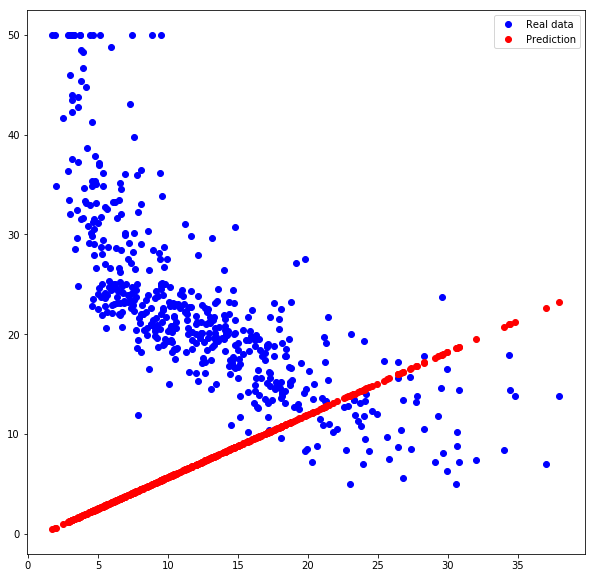


Step 5000: w [-0.75932795] b [31.377121]
loss 40.91716766357422


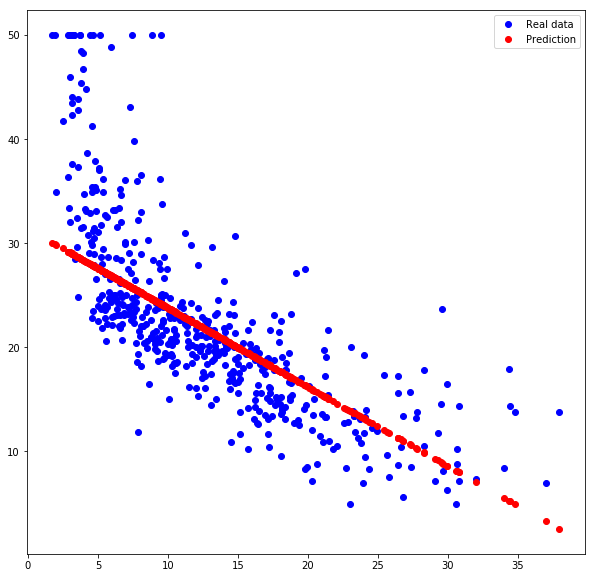


Step 10000: w [-0.93281496] b [34.266777]
loss 38.50284194946289


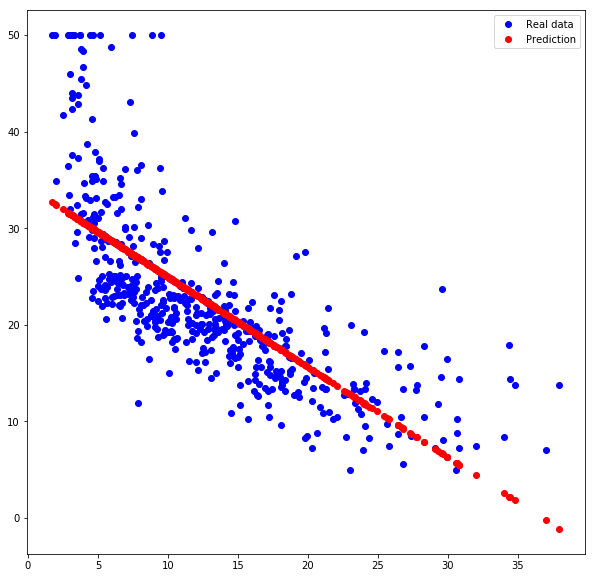


Step 15000: w [-0.9484839] b [34.527763]
loss 38.483131408691406


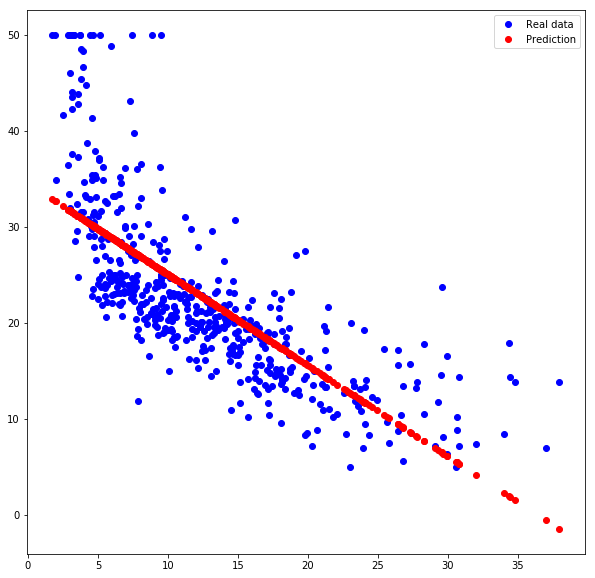


Step 20000: w [-0.94981205] b [34.549885]
loss 38.482967376708984


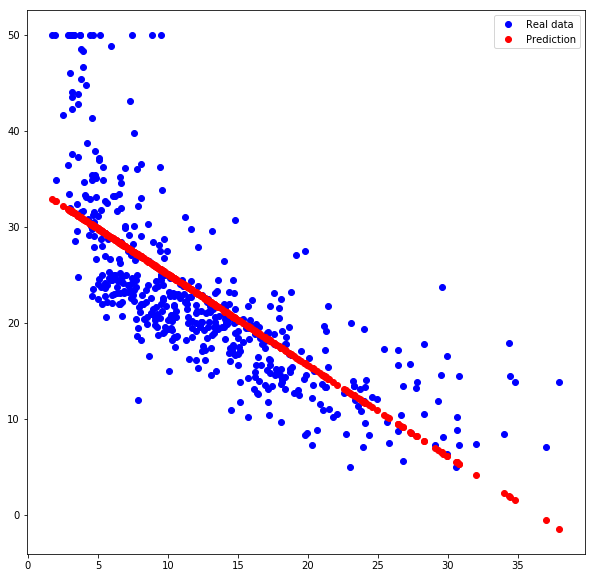

In [8]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) 

    for step in range(20001):
        sess.run(train)
        if step % 5000 == 0:
            print('Step {}: w {} b {}'.format(step, sess.run(w), sess.run(b)))
            print('loss {}'.format(sess.run(loss)))
            
            plt.figure(figsize = (10,10))
            plt.plot(x_data, y_data, 'bo', label='Real data')
            plt.plot(x_data, x_data * sess.run(w) + sess.run(b), 'ro', label='Prediction')
            plt.legend()
            plt.show()
            print()

    w_out, b_out = sess.run([w, b]) 